# Soft Computing

## Cvičení 11 - Bayesovská statistika

Materiály k samostudiu:
* [Kaggle](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python)
* [machinelearningmastery](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)

### On-site cvičení

#### 11.1 Bayesova věta


<img src="SOC11_soubory/bayesuvteorem.png" style="height:100px">

In [105]:
import math

def stredni_hodnota(xs):
    return sum(xs)/len(xs)

def rozptyl(xs):
    mu = stredni_hodnota(xs)
    return sum([(xi - mu)**2 for xi in xs])/(len(xs)-1)

def gauss(x, xs):
    mu = stredni_hodnota(xs)
    var = rozptyl(xs)
    return 1./math.sqrt(2*math.pi*var)*math.exp(-(x-mu)**2/(2*var))

def pocet_nalezu(x, xs):
    return len([xs[i] for i in range(len(xs)) if xs[i] == x])

def sloupec(X, j):
    return [Xi[j] for Xi in X]

def gaussovsky_NBK(x, X, Y, datovy_typ):

    ys = list(set(Y))

    #spočítáme pravděpodobnost pro každou třídu
    P = [1]*len(ys)
    for k in range(len(P)):

        #ponecháme pouze ty řádky s k-tou třídou
        xs = [X[i] for i in range(len(X)) if ys[k] == Y[i]]

        #projedeme všechny atributy naměřených vstupních dat
        for j in range(len(x)):

            #podle typu dat se rozhodneme o způsobu výpočtu pravděpodobnosti
            if datovy_typ[j] == "nominal":
                P[k] *= pocet_nalezu(x[j], sloupec(xs,j))/len(xs)
            elif datovy_typ[j] == "gauss":
                P[k] *= gauss(x[j], sloupec(xs, j))

        #spočítáme ještě apriorní pravděpodobnost třídy yk
        P[k] *= len([y == ys[k] for y in Y])/len(Y)

    #vrátíme třídy a k nim pravděpodobnost, že do ní naměřená data náleží
    return list(zip(ys, P))

In [106]:
X = [["ano", "svobodný", 125], ["ne", "ženatý", 100], ["ne", "svobodný", 70], ["ano", "ženatý", 120],
    ["ne", "rozvedený", 95],["ne", "ženatý", 60], ["ano", "rozvedený", 220], ["ne", "svobodný", 85],
    ["ne", "ženatý", 75], ["ne", "svobodný", 90]]

Y = ["ne", "ne", "ne", "ne", "ano", "ne", "ne", "ano", "ne", "ano"]

x = ["ne", "ženatý", 120]

datovy_typ=["nominal","nominal","gauss"]

print(gaussovsky_NBK(x, X, Y, datovy_typ))

[('ne', 0.0023485046071574037), ('ano', 0.0)]


#### 11.2 Naivní Bayesův klasifikátor (čistější kód)

In [ ]:
!python3 -m pip install pandas

In [29]:
class NaiveBayesClassifier:
    
    def __init__(self, X, y):
        self.X = X                                      # vstupní data (matice vektorů atributů)
        self.y = y                                      # cílové třídy (vektor klasifikace)
        self.N = len(self.X)                            # velikost datové sady
        self.dim = len(self.X[0])                       # dimenze vektoru atributů (počet atributů)
        self.attrs = [[] for _ in range(self.dim)]      # matice pro hodnoty vektorů atributů
        self.classes = {}                               # třídy yi s počtem výskytů xj klasifikovaných jako yi
        self.data = []                                  # seznam pro uložení vektoru atributů a příslušné třídy
        
        #explorační analýza vektorů atributů a příslušných přiřazených tříd
        for i in range(len(self.X)):                    # projdeme všechny vektory atributů z datové sady
            for j in range(self.dim):                   # projdeme všechny atributy
                if not self.X[i][j] in self.attrs[j]:   # pokud vidíme hodnotu atributu poprvé
                    self.attrs[j].append(self.X[i][j])  # tak ji přidáme do seznamu hodnot atributů
            if not self.y[i] in self.classes.keys():    # pokud vidíme třídu poprvé
                self.classes[self.y[i]] = 1             # tak ji přidáme do slovníku tříd s prvním nálezem
            else:
                self.classes[self.y[i]] += 1            # v opačném případě inkrementujeme počet nálezů třídy
            self.data.append([self.X[i], self.y[i]])    # uložení řádku do matice dat
            
    
    def classify(self, data):                           # klasifikace vektoru atributů do třídy
        max_y = None                                    # nejvhodnější třída
        max_arg = -1                                    # hodnota největší pravděpodobnosti

        for y in self.classes.keys():                   # projdeme každou třídu yi
            prob = self.classes[y]/self.N               # spočítáme apriorní pravděpodobnost P(y) = N(y)/N
            for i in range(self.dim):                   # získáme všechny řádky s i-tým atributem xi ze třídy y
                cases = [x for x in self.data if x[0][i] == data[i] and x[1] == y]
                n = len(cases)                          # spočítáme počet nálezů atributu (počet řádků x)
                prob *= n/self.N                        # věrohodnost P *= P(xi|yi)
                
            if prob > max_arg:                          # pokud je pravděpodobnost vyšší než doposud nejvyšší
                max_y = y                               # zapíšeme si nejvhodnější nalezenou třídu (aktuální)
                max_arg = prob                          # a pravděpodobnost této třídy

        return max_y

**Načtení dat**

In [17]:
import pandas as pd

In [30]:
#načteme data o přeživších/nepřeživších katastofy Titanicu a podíváme se na první z nich
data = pd.read_csv('SOC11_soubory/titanic.csv')
print(data.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


**Úprava dat**

In [31]:
# třídy si pojmenujeme jako řetězce "yes" a "no" místo v = 1 nebo 0
y = list(map(lambda x: 'yes' if x == 1 else 'no', data['Survived'].values))

# pro klasifikace použijeme jen některé atributy, které měly pravděpodobně vliv na přežití
X = data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']].values

#zjistíme N (train + test)
print(len(y)) # 887

# rozdělíme data na trénovací (600) a testovací (287)
X_train, X_val, y_train, y_val= X[:600], X[600:], y[:600], y[600:]

887


**Instantizace modelu a trénink modelu**

In [32]:
nbc = NaiveBayesClassifier(X_train, y_train)

**Predikce a měření úspěšnosti modelu**

In [33]:
total_cases = len(y_val)                        # velikost testovací datové sady
good = 0                                        # akumulátor pro úspěšně klasifikované
bad = 0                                         # akumulátor pro špatně klasifikované
for i in range(total_cases):                    # projdeme všechny testovací případy
    predict = nbc.classify(X_val[i])            # provedene klasifikaci modelem
    if y_val[i] == predict:                     # zaneseme výsledek správné nebo nesprávně klasifikace
        good += 1
    else:
        bad += 1

**Statistiky úspěšnosti**

In [34]:
print('TOTAL EXAMPLES:', total_cases)
print('RIGHT:', good)
print('WRONG:', bad)
print('ACCURACY:', good/total_cases)

TOTAL EXAMPLES: 287
RIGHT: 200
WRONG: 87
ACCURACY: 0.6968641114982579


#### 11.5 Gaussovský Naivní Bayesův klasifikátor

Klasifikátor pro spojité hodnoty s Gaussovským rozdělením. Datová sada musí mít atributy, jejichž hodnota se pohybuje kolem nějakého středu s rozumným (Gaussovským) rozptylem kolem této střední hodnoty. Mohou to být například fyzické proporce lidí nebo i v klinické praxi fyzické informace o rozměrech nádorů.

**Nahrání potřebných knihoven**

In [107]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

**Stáhnutí datové sady**

In [111]:
dataset = pd.read_csv("SOC11_soubory/cancer.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Explorační analýza**

In [112]:
dataset.info()
dataset = dataset.drop(["id"], axis = 1)
dataset = dataset.drop(["Unnamed: 32"], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Vizualizace datové sady**

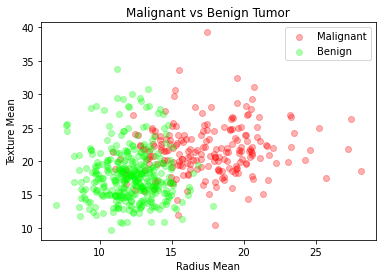

In [113]:
M = dataset[dataset.diagnosis == "M"]
B = dataset[dataset.diagnosis == "B"]
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

**Preprocessing**

In [119]:
dataset.diagnosis = [1 if i== "M" else 0 for i in dataset.diagnosis]
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values
print(x)
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

**Normalizace dat**

In [120]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

**Rozdělení datové sady na trénovací a testovací**

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

**Instantizace a trénování modelu**

In [122]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
GaussianNB()

GaussianNB()

**Měření přesnosti klasifikace**

In [123]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  1.0


#### 11.6 Multinomiální Naivní Bayesův klasifikátor

Klasifikátor pro data, která jsou z multinomálního rozdělení. Jedná se tedy o data, jejichž atributy mají nějaké diskrétní počet výskytů. Využívá se zejména u klasifikaci textu, kde například ve spamu v emailu se bude často opakovat nějaké slovo.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
data = pd.read_csv('SOC11_soubory/google_play_reviews.csv')
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [48]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop('package_name', axis=1)
    
    # Convert text to lowercase
    data['review'] = data['review'].str.strip().str.lower()
    return data

In [49]:
data = preprocess_data(data)
# Split into training and testing data
x = data['review']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [50]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [51]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [52]:
model.score(x_test, y_test)

0.8565022421524664

In [53]:
model.predict(vec.transform(['Love this app simply awesome!']))

array([1])

#### 11.7 Bernoulliho Naivní Bayesův klasifikátor

Klasifikátor pro datové s atributy, která jsou z Bernoulliho rozdělení (boolovské hodnoty). Jedná se tedy o vektory, kde atributy jsou absence nebo přítomnost nějakého znaku.

**Nahrání potřebných knihoven**

In [147]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

**Získání rozdělení dat**

In [148]:
nb_samples = 300
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

**Vizualizace dat**

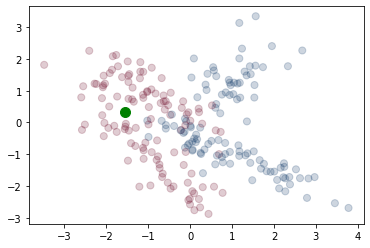

In [167]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train[:],s=50, cmap='RdBu', alpha=0.2)
plt.scatter(X_test[1, 0], X_test[1, 1], c="green", s=100, cmap='RdBu')

**Tvorba a učení modelu**

In [149]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8133333333333334

**Měření přesnosti klasifikace**

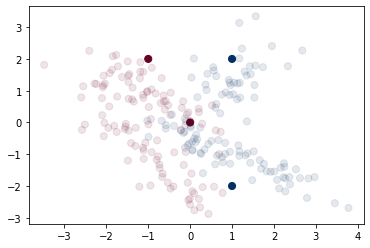

In [171]:
x1 = [0, 0]
x2 = [-1, 2]
x3 = [1, 2]
x4 = [1, -2]
data = np.array([x1,x2,x3,x4])
y = bnb.predict(data)
plt.scatter(data[:,0], data[:,1], c=y[:],s=50, cmap='RdBu')
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train[:],s=50, cmap='RdBu', alpha=0.1)